# Aplicación 1: Optimización bajo restricción de riesgo
## Objetivo
## Diseñar el portafolio de mayor rendimiento esperado sujeto a un límite de riesgo.

## Instrucciones

Generen al menos 30 combinaciones de pesos (que sumen 1).

Simulen entre 5,000 y 10,000 rendimientos para cada combinación.

Calculen para cada portafolio:

Rendimiento promedio.

Desviación estándar.

VaR 95%.

Impongan la restricción:

VaR 95% ≥ –5%.

Identifiquen el portafolio con mayor rendimiento esperado que cumpla la restricción.

## Construyan:

Scatter plot riesgo (desviación o VaR) vs rendimiento esperado.

Histograma del portafolio elegido.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

In [ ]:
# Descarga de datos
stocks = ["AAPL","MSFT","GOOGL","AMZN"]
end = dt.datetime.today()
start = end - dt.timedelta(days=365*3)

data = yf.download(stocks,start=start,end=end)["Close"]
returns = data.pct_change().dropna()

n_sim=10000
n_assets=len(stocks)
n_days=252

[*********************100%***********************]  4 of 4 completed


In [ ]:
#1. Calcular históricas
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [ ]:
# 2. Generar las 30 combinaciones de pesos (si no las has guardado)
np.random.seed(42)
weights_matrix = np.random.random((30, n_assets))
weights_matrix = weights_matrix / weights_matrix.sum(axis=1)[:, np.newaxis]

In [10]:
# 3. Función de simulación adaptada de tu código para obtener Rendimiento y Riesgo
def simulate_portfolio_performance(weights, mean_returns, cov_matrix, n_days, n_sim):
    L = np.linalg.cholesky(cov_matrix)
    final_returns = np.zeros(n_sim)
    for i in range(n_sim):
        Z = np.random.normal(size=(n_days, len(weights)))
        daily_sim_returns = (Z @ L.T) + mean_returns.values
        port_daily = daily_sim_returns @ weights
        path = np.cumprod(1 + port_daily)
        final_returns[i] = path[-1] - 1
    return final_returns

In [11]:
# 4. Ejecutar la simulación para cada una de las 30 combinaciones
results = []
for i in range(30):
    w = weights_matrix[i]
    simulated_outcomes = simulate_portfolio_performance(w, mean_returns, cov_matrix, n_days, n_sim)
    exp_return = simulated_outcomes.mean()      # Rendimiento esperado
    risk_std = simulated_outcomes.std()        # Volatilidad simulada
    var_95 = np.percentile(simulated_outcomes, 5) # VaR al 95% (percentil 5)
    results.append({
        'Portafolio': i + 1,
        'Retorno_Esperado': exp_return,
        'Volatilidad': risk_std,
        'VaR_95': var_95,
        'Pesos': w
    })


In [12]:
# Convertir a DataFrame para análisis
df_results = pd.DataFrame(results)
df_results.head()

,Portafolio,Retorno_Esperado,Volatilidad,VaR_95,Pesos
0,1,0.372410,0.315442,-0.085975,"[0.1410215567872302, 0.3579622176722185, 0.275..."
1,2,0.250843,0.271708,-0.140383,"[0.12620080734580005, 0.12618129700478345, 0.0..."
2,3,0.275152,0.280516,-0.130180,"[0.26139050028350513, 0.3079002216404562, 0.00..."
3,4,0.320045,0.292630,-0.098289,"[0.5903801501374071, 0.15059391470113248, 0.12..."
4,5,0.372583,0.312999,-0.078043,"[0.1960105449641472, 0.33807860847040766, 0.27..."


In [17]:
df_filtrado = df_results[df_results['VaR_95'] >= -0.05]
df_filtrado

,Portafolio,Retorno_Esperado,Volatilidad,VaR_95,Pesos
7,8,0.389270,0.308030,-0.048921,"[0.418096105230573, 0.03278234139631074, 0.428..."
9,10,0.387586,0.299795,-0.048091,"[0.19952805069164697, 0.06397716875212663, 0.4..."
27,28,0.378369,0.298650,-0.044118,"[0.30234280665296986, 0.10172425090699433, 0.3..."


In [22]:
# 6. Identificar el portafolio con MAYOR rendimiento esperado
portafolio_maximo = df_results.loc[df_results['Retorno_Esperado'].idxmax()]
portafolio_maximo
portafolio_optimo = df_filtrado.loc[df_filtrado['Retorno_Esperado'].idxmax()]
portafolio_optimo, portafolio_maximo

(Portafolio                                                          8
 Retorno_Esperado                                              0.38927
 Volatilidad                                                   0.30803
 VaR_95                                                      -0.048921
 Pesos               [0.418096105230573, 0.03278234139631074, 0.428...
 Name: 7, dtype: object,
 Portafolio                                                         18
 Retorno_Esperado                                              0.42779
 Volatilidad                                                  0.362255
 VaR_95                                                      -0.081511
 Pesos               [0.0366811237457329, 0.4855775893765176, 0.379...
 Name: 17, dtype: object)

C:\Users\eduve\AppData\Local\Temp\ipykernel_9636\1219793687.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


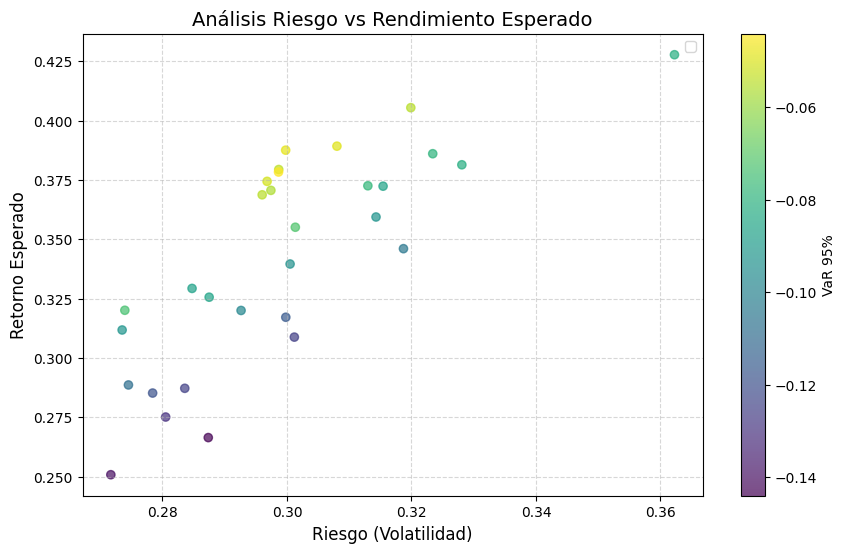

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_results['Volatilidad'], df_results['Retorno_Esperado'], c=df_results['VaR_95'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='VaR 95%')
plt.title('Análisis Riesgo vs Rendimiento Esperado', fontsize=14)
plt.xlabel('Riesgo (Volatilidad)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

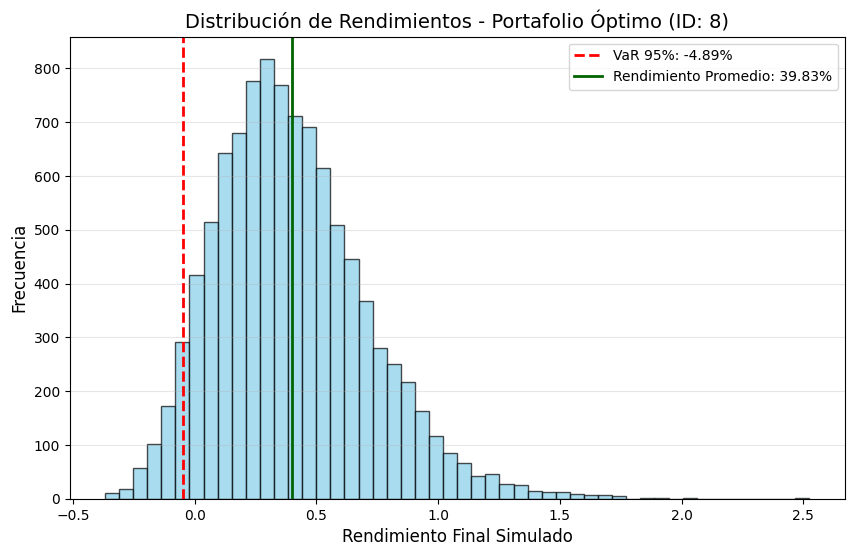

In [21]:
rendimientos_ganador = simulate_portfolio_performance(portafolio_optimo['Pesos'], mean_returns, cov_matrix, n_days, n_sim)

plt.figure(figsize=(10, 6))
plt.hist(rendimientos_ganador, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(portafolio_optimo['VaR_95'], color='red', linestyle='--', linewidth=2,label=f'VaR 95%: {portafolio_optimo["VaR_95"]:.2%}')
plt.axvline(rendimientos_ganador.mean(), color='darkgreen', linestyle='-', linewidth=2,label=f'Rendimiento Promedio: {rendimientos_ganador.mean():.2%}')
plt.title(f'Distribución de Rendimientos - Portafolio Óptimo (ID: {portafolio_optimo["Portafolio"]})', fontsize=14)
plt.xlabel('Rendimiento Final Simulado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Respondan:

**¿Cuántos portafolios cumplen la restricción?**

Sólo 3 de mis portafolios la cumplieron.

**¿Cuánto rendimiento se sacrifica por controlar riesgo?**

Mi máximo portafolio tuvo un rendimiento de 42.78% y el portafolio optimo con la restricción de riesgo tuvo un rendimiento de 38.93%, sacrificamos 3.85% de rendimiento esperado.